In [1]:
from matplotlib import pyplot as plt
from math import log2
import numpy as np

In [2]:
gurobi_data_k71 = np.array([
    [1920, -1.0],
[240, 4.0],
[480, 4.0],
[30, 89.0],
[30, 89.0],
[30, 91.0],
[120, 91.0],
[240, 4.0],
[960, 4.0],
[960, 91.0],
[960, 91.0],
[3840, -41.0],
[60, 6.0],
[120, 92.0],
[480, 6.0],
[30, 92.0],
[960, 4.0],
[1920, -1.0],
[3840, -80.0],
[240, 15.0],
[1920, -41.0],
[120, 92.0],
[240, 93.0],
[960, 10.0],
[60, 91.0],
[960, 4.0],
[120, 96.0],
[120, 91.0],
[960, 10.0],
[60, 10.0],
[60, 96.0],
[960, 15.0],
[60, 16.0],
[480, 91.0],
[30, 92.0],
[480, 10.0],
[240, 9.0],
[60, 92.0],
[60, 91.0],
[60, 16.0],
[240, 9.0],
[240, 4.0],
[480, 10.0],
[480, 2.0],
[480, 6.0],
[3840, 4.0],
[1920, 7.0],
[30, 177.0],
[240, 94.0],
[960, 9.0],
[480, 10.0],
[1920, -1.0],
[480, 6.0],
[1920, 10.0],
[120, 89.0],
[480, 93.0],
[240, 9.0],
[30, 10.0],
[120, 91.0],
[30, 94.0],
[60, 89.0],
[240, 4.0],
[960, 89.0],
[30, 89.0],
[60, 6.0],
[120, 10.0],
[120, 6.0],
[120, 94.0],
[3840, -67.0],
[30, 16.0]
])
gurobi_data_k71 = np.array(sorted(gurobi_data_k71, key=lambda e: e[0]))

In [3]:
save_file='../../out/data.gurobi.k71.npy'
np.save(save_file, gurobi_data_k71)

In [4]:
times, time_counts = np.unique(gurobi_data_k71[:, 0], return_counts=True)

In [5]:
dwave_data_k51 = np.load('../../out/data.dwave.k51.npy')
dwave_data_k61 = np.load('../../out/data.dwave.k61.npy')
dwave_data_k71 = np.load('../../out/data.dwave.k71.npy')

mqlib_data_k61 = np.load('../../out/data.mqlib.k61.npy')
mqlib_data_k71 = np.load('../../out/data.mqlib.k71.npy')

gurobi_data_k71 = np.load('../../out/data.gurobi.k71.npy')

In [10]:
def plot_qubo_data(*args):
    fig, ax = plt.subplots()
    
    min_val = min(np.min(arg[:, 1]) for arg in args) - 1
    colours = ['tab:blue', 'tab:orange', 'tab:green']
    names = ['D-Wave', 'Gurobi', 'MQLib']
    
    for idx, data in enumerate(args):
        unique_data, unique_counts = np.unique(data, return_counts=True, axis=0)
        times, time_counts = np.unique(data[:, 0], return_counts=True)
        marker_sizes = np.zeros_like(unique_data[:, 0])
        for i in range(unique_counts.shape[0]):
            marker_sizes[i] = 10 ** 2 * (unique_counts[i] / time_counts[np.argmax(times == unique_data[i, 0])])
        ax.scatter(unique_data[:, 0] / 60, unique_data[:, 1] - min_val, s=marker_sizes, c=colours[idx], label=names[idx], alpha=0.5)
        
    ax.set_xlabel(r'$T / 60$')
    ax.set_ylabel(r'Energy $-$ minEnergy $+ 1$')
    ax.set_xscale('log', base=2)
    ax.set_yscale('log')
    ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), labelspacing=3)
    ax.grid(True, which="major", axis='y')
    fig.tight_layout()
    plt.show()

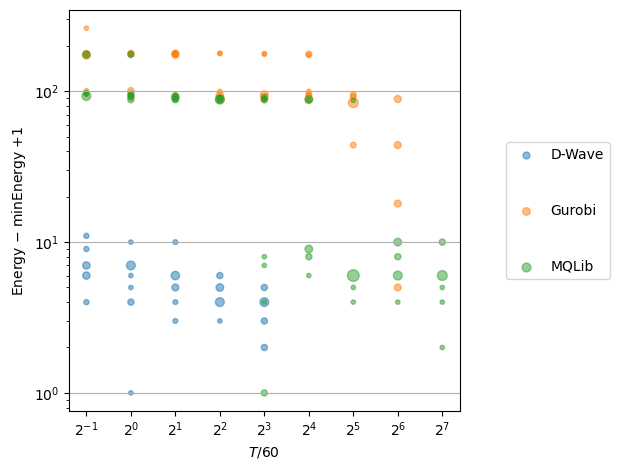

In [11]:
plot_qubo_data(dwave_data_k71, gurobi_data_k71, mqlib_data_k71)